In [0]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
wb = xlrd.open_workbook('/content/drive/My Drive/Data/SCOOP-Rating-Performance.xls')

In [0]:
ws = wb.sheet_by_index(0)

In [0]:
ws.nrows

3617

In [0]:
print(ws.row(49)[0].value)
type(ws.row(49)[0].value)

43861.0


float

In [0]:
ws.row(49)

[xldate:43861.0,
 text:'Reynolds Consumer Products ',
 text:'REYN',
 text:'Credit Suisse/ Goldman Sachs/ J.P. Morgan ',
 number:26.0,
 number:27.5,
 number:28.55,
 number:0.0980769230769231,
 number:1.5,
 number:2.5500000000000007,
 number:2.0,
 empty:'']

In [0]:
ipo_list = []
for i in range(36,ws.nrows):
    if isinstance(ws.row(i)[0].value, float):
        ipo_list.append([x.value for x in ws.row(i)])
    else:
        print(i, ws.row(i))

36 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
37 [empty:'', number:2020.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
86 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
87 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
88 [text:'Trade', empty:'', empty:'', text:'Lead/Joint-Lead', text:'Offer', text:'Opening', text:'1st Day', text:'1st Day', text:'$ Change', text:'$ Change', text:'Star', empty:'']
89 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
90 [empty:'', number:2019.0, empty:'', empty:'', empty:'', emp

In [0]:
len(ipo_list)

3475

In [0]:
df = pd.DataFrame(ipo_list)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,


In [0]:
df.columns = ['Date', 'Company', 'Ticker', 'Managers', \
              'Offer Price', 'Opening Price', '1st Day Close',\
              '1st Day % Chg', '$ Chg Open', '$ Chg Close',\
              'Star Rating', 'Performed']

In [0]:
df.head(20)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,
5,43854.0,SCVX Corp.,SCVXU,Credit Suisse,10.0,10.30,10.32,0.032,0.30,0.32,1,
6,43858.0,AnPac Bio-Medical Science,ANPC,WestPark Capital,12.0,12.00,11.25,-0.0625,0.00,-0.75,1,
7,43859.0,Annovis Bio,ANVS,ThinkEquity (a division of Fordham Financial M...,6.0,6.63,9.59,0.598333,0.63,3.59,1,Missed
8,43859.0,Black Diamond Therapeutics,BDTX,J.P. Morgan/ Jefferies/ Cowen,19.0,33.00,39.48,1.07789,14.00,20.48,3,
9,43861.0,1Life Healthcare,OWEM,J.P. Morgan/ Morgan Stanley,14.0,18.00,22.07,0.576429,4.00,8.07,2,


In [0]:
def to_date(x):
    return xlrd.xldate.xldate_as_datetime(x, wb.datemode)

In [0]:
df['Date'] = df['Date'].apply(to_date)

In [0]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.0892857,0.7500,-1.2500,2,
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.0572727,0.0300,0.6300,1,
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0,0.0000,0.0000,1,
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.0392308,0.8500,0.5100,1,
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045,0.5200,0.4500,1,
...,...,...,...,...,...,...,...,...,...,...,...,...
3470,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,
3471,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225,2.0625,4.5000,2,
3472,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,
3473,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.0394737,1.0625,0.3750,2,


In [0]:
df['Year'], df['Month'], df['Day'], df['Day of Week'] = \
df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day, df['Date'].dt.weekday

In [0]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.0892857,0.7500,-1.2500,2,,2020,1,17,4
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.0572727,0.0300,0.6300,1,,2020,1,17,4
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0,0.0000,0.0000,1,,2020,1,17,4
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.0392308,0.8500,0.5100,1,,2020,1,17,4
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045,0.5200,0.4500,1,,2020,1,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,,2000,12,8,4
3471,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225,2.0625,4.5000,2,,2000,12,8,4
3472,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,,2000,12,11,0
3473,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.0394737,1.0625,0.3750,2,,2000,12,12,1


In [0]:
by_year_cnt = df.groupby('Year')[['Ticker']].count()
by_year_cnt

,Ticker
Year,
2000,237
2001,94
2002,82
2003,80
2004,233
2005,226
2006,237
2007,256
2008,47


In [0]:
df.iloc[100:110,:]

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
100,2018-06-27,Lovesac Co.,LOVE,Roth Capital Partners,16.0,25.00,23.99,0.499375,9.00,7.99,2,,2018,6,27,2
101,2018-06-27,Neon Therapeutics,NTGN,Morgan Stanley/ BofA Merrill Lynch/ Mizuho Sec...,16.0,16.00,15.00,-0.0625,0.00,-1.00,1,Missed,2018,6,27,2
102,2018-06-27,Uxin Limited,UXIN,Morgan Stanley/ Goldman Sachs (Asia)/ J.P. Mor...,9.0,10.40,9.67,0.0744444,1.40,0.67,1,,2018,6,27,2
103,2018-06-28,BJ’s Wholesale Club Holdings,BJ,BofA Merrill Lynch/ Deutsche Bank Securities/ ...,17.0,21.25,22.00,0.294118,4.25,5.00,3,,2018,6,28,3
104,2018-06-28,BrightView Holdings,BV,Goldman Sachs/ J.P. Morgan/ KKR/ UBS Investmen...,22.0,21.25,21.40,-0.0272727,-0.75,-0.60,2,Missed,2018,6,28,3
105,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.0,7.30,6.28,-0.215,-0.70,-1.72,N/C,,2018,6,28,3
106,2018-06-28,Entera Bio Ltd.,ENTXW,Maxim Group,0.0,0.96,0.81,,0.96,0.81,N/C,,2018,6,28,3
107,2018-06-28,EverQuote,EVER,J.P. Morgan/ BofA Merrill Lynch,18.0,21.15,18.02,0.00111111,3.15,0.02,3,,2018,6,28,3
108,2018-06-28,Forty Seven,FTSV,Morgan Stanley/ Credit Suisse,16.0,15.01,15.05,-0.059375,-0.99,-0.95,2,Missed,2018,6,28,3
109,2018-06-28,HL Acquisitions,HCCHU,EarlyBirdCapital,10.0,10.05,10.07,0.007,0.05,0.07,1,,2018,6,28,3


In [0]:
df[df['Offer Price'] < 5].index

Int64Index([  30,   48,   88,  181,  241,  247,  298,  304,  307,  375,  404,
             610,  698,  716, 1075, 1377, 1531, 1584, 1655, 1751, 1767, 1811,
            1822, 1849, 1895, 1897, 1921, 2484, 2988, 3223],
           dtype='int64')

In [0]:
df.drop(df[df['Offer Price'] < 5].index, inplace=True)

In [0]:
df.reset_index(drop=True, inplace=True)

In [0]:
df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg            object
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

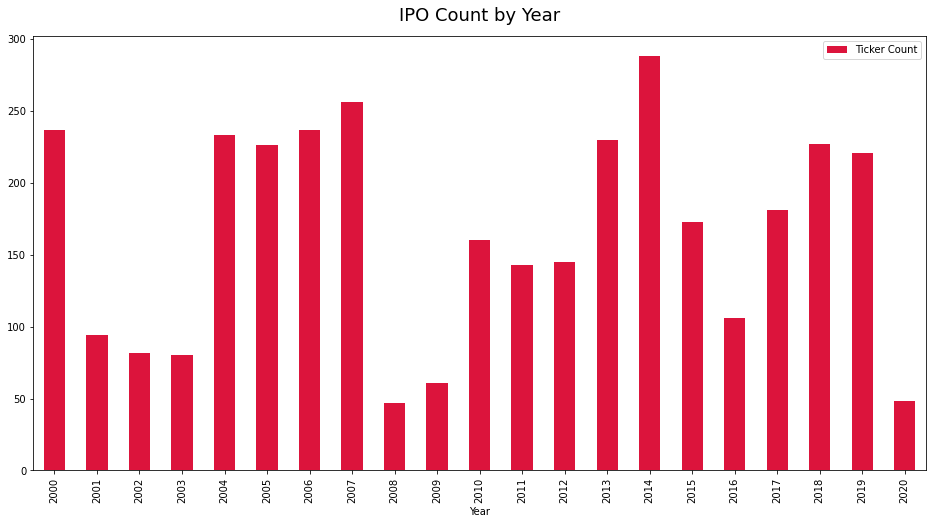

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
by_year_cnt.plot(kind='bar', ax=ax, color='crimson')
ax.legend(['Ticker Count'])
ax.set_title('IPO Count by Year', fontdict={'size': 18}, y=1.02);

In [0]:
df['1st Day % Chg'] = df['1st Day % Chg'].astype(float)

In [0]:
df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg           float64
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

In [0]:
df['Star Rating'].unique()

array([2.0, 1.0, 3.0, 'NC', 'N/C', 4.0, 5.0], dtype=object)

In [0]:
df['Performed'].unique()

array(['', 'Missed', 'No Call'], dtype=object)

In [0]:
summary_by_year = df.groupby('Year')['1st Day % Chg'].describe()
summary_by_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


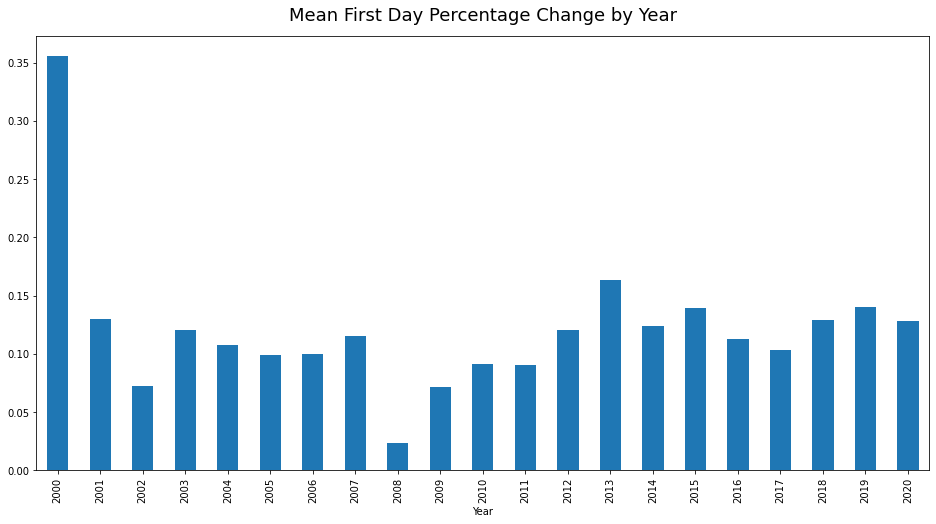

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
summary_by_year['mean'].plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Percentage Change by Year', fontdict={'size': 18}, y=1.02);

In [0]:
summary_by_year.corr()

,count,mean,std,min,25%,50%,75%,max
count,1.000000,0.405234,0.461353,-0.450764,0.311504,0.193556,0.419705,0.573165
mean,0.405234,1.000000,0.904995,-0.169214,0.515311,0.835229,0.944402,0.510705
std,0.461353,0.904995,1.000000,-0.281134,0.300520,0.588649,0.818368,0.734161
min,-0.450764,-0.169214,-0.281134,1.000000,-0.076636,0.021984,-0.186785,-0.152542
25%,0.311504,0.515311,0.300520,-0.076636,1.000000,0.561933,0.595501,0.267135
50%,0.193556,0.835229,0.588649,0.021984,0.561933,1.000000,0.768890,0.233572
75%,0.419705,0.944402,0.818368,-0.186785,0.595501,0.768890,1.000000,0.464806
max,0.573165,0.510705,0.734161,-0.152542,0.267135,0.233572,0.464806,1.000000


In [0]:
df['1st Day Open to Close % Chg'] = ((df['1st Day Close'] - df['Opening Price'])/df['Opening Price'])

In [0]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,,2020,1,17,4,-0.135593
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,,2020,1,17,4,0.054397
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,,2020,1,17,4,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,,2020,1,17,4,-0.024549
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,,2020,1,24,4,-0.006654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,,2000,12,8,4,0.062678
3441,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,,2000,12,8,4,0.110482
3442,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,,2000,12,11,0,0.114583
3443,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,,2000,12,12,1,-0.065089


In [0]:
df['1st Day Open to Close % Chg'].describe()

count    3445.000000
mean        0.013564
std         0.114739
min        -0.492812
25%        -0.028871
50%         0.000000
75%         0.039474
max         2.173653
Name: 1st Day Open to Close % Chg, dtype: float64

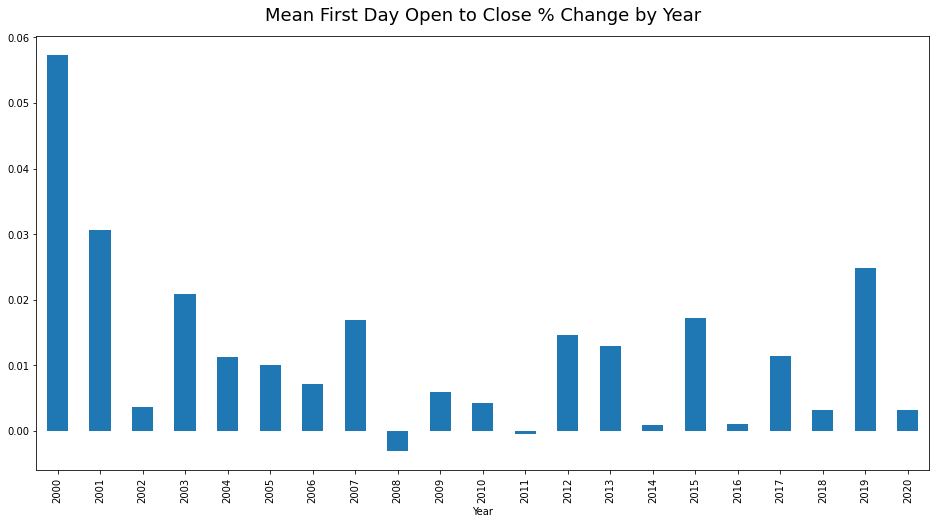

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby('Year')['1st Day Open to Close % Chg'].mean().plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Open to Close % Change by Year', fontdict={'size': 18}, y=1.02);

In [0]:
mean_delta_by_year = df.groupby('Year')[['1st Day Open to Close % Chg']].mean()

In [0]:
mean_delta_by_year.sort_values(ascending=False, by='1st Day Open to Close % Chg')

,1st Day Open to Close % Chg
Year,
2000,0.057282
2001,0.030659
2019,0.024807
2003,0.020931
2015,0.017152
2007,0.016880
2012,0.014646
2013,0.012897
2017,0.011418


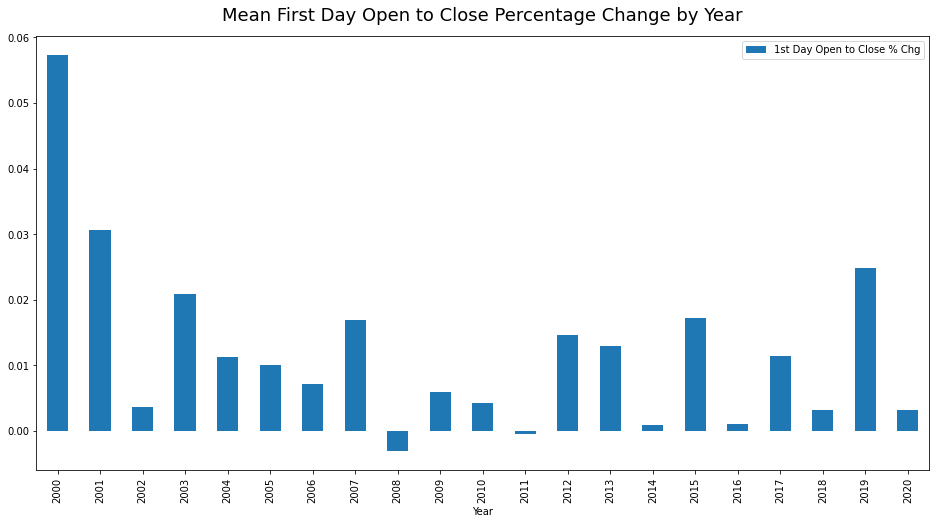

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
mean_delta_by_year.plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Open to Close Percentage Change by Year', fontdict={'size': 18}, y=1.02);

In [0]:
df['1st Day Open to Close $ Chg'] = (df['1st Day Close'] - df['Opening Price'])

In [0]:
df[df['Year']==2018].sum()

Company                        Nebula Acquisition Industrial Logistics Proper...
Ticker                         NEBUUILPTLBRTEAGLUPAGSEYENGTESGPAQUMNLOARMOAGS...
Managers                       Deutsche Bank Securities/ Goldman SachsUBS Inv...
Offer Price                                                              3118.32
Opening Price                                                            3602.11
1st Day Close                                                            3624.75
1st Day % Chg                                                            28.7202
$ Chg Open                                                               483.795
$ Chg Close                                                              519.935
Performed                      MissedMissedMissedMissedMissedMissedMissedMiss...
Year                                                                      447996
Month                                                                       1464
Day                         

In [0]:
df[df['Year']==2018]['1st Day Open to Close $ Chg'].describe()

count    222.000000
mean       0.101982
std        2.066822
min       -6.260000
25%       -0.715000
50%        0.000000
75%        0.290000
max        9.940000
Name: 1st Day Open to Close $ Chg, dtype: float64

In [0]:
df[df['Year']==2018]['1st Day Open to Close $ Chg'].sum()

22.639999999999997

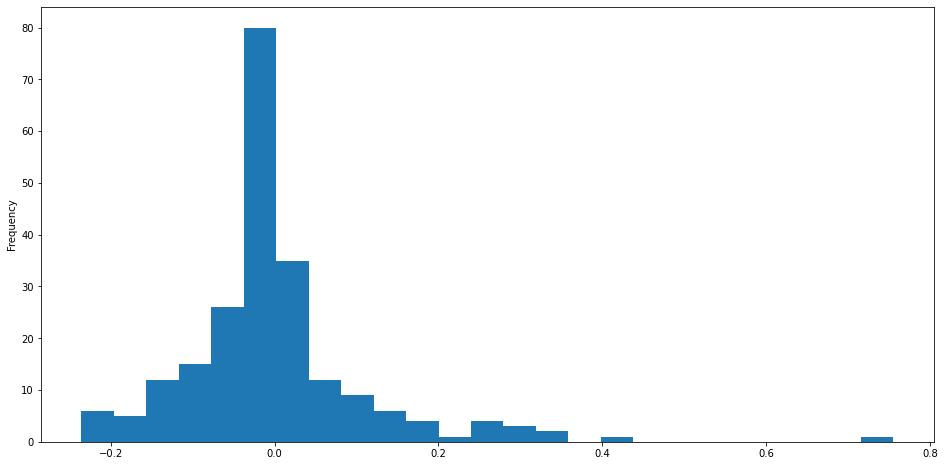

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Year']==2018]['1st Day Open to Close % Chg'].plot(kind='hist', bins=25, ax=ax)

In [0]:
df[(df['Year']==2018)&(df['1st Day Open to Close % Chg']>=.2)]['Ticker'].count()/df[(df['Year']==2018)]['Ticker'].count()*100

5.8558558558558556

In [0]:
df[(df['Year']==2018)&(df['1st Day Open to Close % Chg']>=.2)]

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg
271,2018-01-25,Menlo Therapeutics,MNLO,Jefferies/ Piper Jaffray/ Guggenheim Securities,17.0,20.50,28.71,0.688824,3.50,11.71,2,,2018,1,25,3,0.400488,8.21
273,2018-01-26,PlayAGS,AGS,Credit Suisse/ Deutsche Bank Securities/ Jeffe...,16.0,14.00,18.50,0.156250,-2.00,2.50,1,,2018,1,26,4,0.321429,4.50
298,2018-03-16,Zscaler,ZS,Morgan Stanley/ Goldman Sachs,16.0,27.50,33.00,1.062500,11.50,17.00,3,,2018,3,16,4,0.200000,5.50
317,2018-04-27,Goosehead Insurance,GSHD,J.P. Morgan/ BofA Merrill Lynch,10.0,12.00,15.75,0.575000,2.00,5.75,1,,2018,4,27,4,0.312500,3.75
343,2018-06-15,Avalara,AVLR,Goldman Sachs/ J.P. Morgan Securities/ BofA Me...,24.0,35.00,44.94,0.872500,11.00,20.94,3,,2018,6,15,4,0.284000,9.94
344,2018-06-15,Puxin Ltd.,NEW,Citigroup/ Deutsche Bank Securities/ Barclays/...,17.0,17.00,21.00,0.235294,0.00,4.00,1,,2018,6,15,4,0.235294,4.00
350,2018-06-21,Aptinyx,APTX,J.P. Morgan/ Cowen/ Leerink Partners/ BMO Capi...,16.0,17.40,22.20,0.387500,1.40,6.20,2,,2018,6,21,3,0.275862,4.80
356,2018-06-21,Xeris Pharmaceuticals,XERS,Jefferies/ Leerink Partners/ RBC Capital Markets,15.0,15.75,20.22,0.348000,0.75,5.22,2,,2018,6,21,3,0.283810,4.47
376,2018-07-18,Crinetics Pharmaceuticals,CRNX,J.P. Morgan/ Leerink Partners/ Piper Jaffray,17.0,19.25,24.51,0.441765,2.25,7.51,2,,2018,7,18,2,0.273247,5.26
385,2018-07-25,Bloom Energy,BE,J.P. Morgan/ Morgan Stanley/ Credit Suisse/ Ke...,15.0,18.70,25.00,0.666667,3.70,10.00,2,,2018,7,25,2,0.336898,6.30


In [0]:
df.groupby(['Year', 'Star Rating'])[['1st Day % Chg']].mean()

1st Day % Chg
Year Star Rating               
2000 1.0               0.007370
     2.0               0.260831
     3.0               0.386016
     4.0               0.788099
     5.0               1.223139
...                         ...
2020 1.0               0.036202
     2.0               0.301213
     3.0               0.427986
     N/C               0.000000
     NC                0.056757

[83 rows x 1 columns]

(-0.5, 2.5)

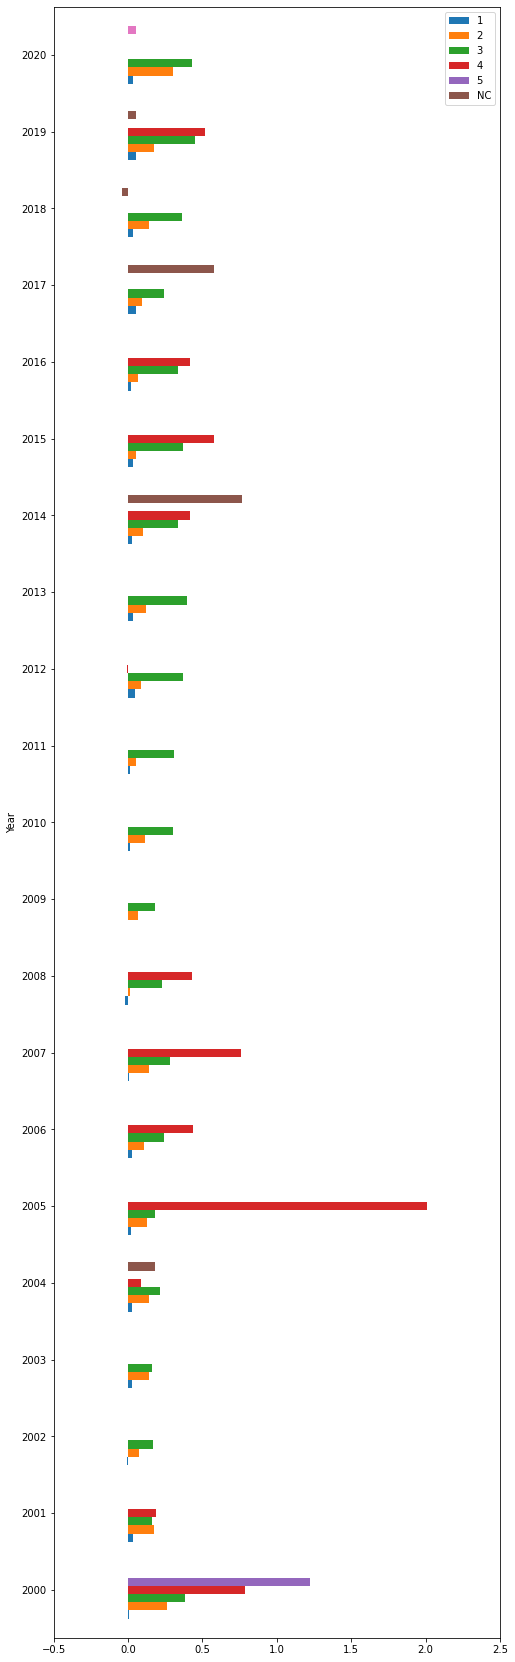

In [0]:
fig, ax = plt.subplots(figsize=(8,30))
df.groupby(['Year', 'Star Rating'])[['1st Day % Chg']].mean().unstack().plot.barh(width=.75, ax=ax);
ax.legend(loc='best', labels=[1,2,3,4,5,'NC'])
ax.set_xlim(-.5, 2.5)

In [0]:
df.groupby(['Year', 'Star Rating'])[['1st Day Open to Close % Chg']].mean()

1st Day Open to Close % Chg
Year Star Rating                             
2000 1.0                            -0.000473
     2.0                             0.079793
     3.0                             0.085180
     4.0                             0.065838
     5.0                             0.005326
...                                       ...
2020 1.0                             0.007393
     2.0                             0.023180
     3.0                            -0.022624
     N/C                            -0.083333
     NC                              0.012429

[83 rows x 1 columns]

(-0.5, 0.5)

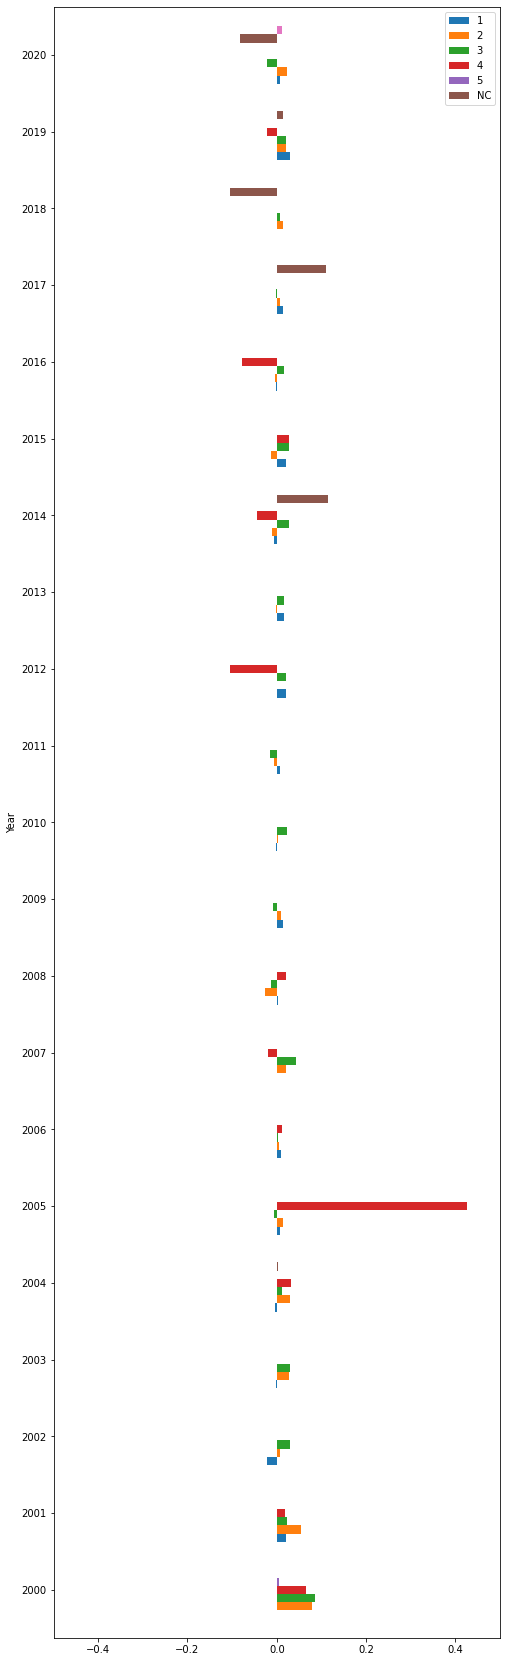

In [0]:
fig, ax = plt.subplots(figsize=(8,30))
df.groupby(['Year', 'Star Rating'])[['1st Day Open to Close % Chg']].mean().unstack().plot.barh(width=.75, ax=ax);
ax.legend(loc='best', labels=[1,2,3,4,5,'NC'])
ax.set_xlim(-.5,.5)

In [0]:
df.groupby('Year')['Star Rating'].value_counts().to_frame()

Star Rating
Year Star Rating             
2000 3.0                   90
     1.0                   59
     2.0                   45
     4.0                   35
     5.0                    8
...                       ...
2020 1.0                   32
     3.0                    7
     2.0                    6
     N/C                    1
     NC                     1

[83 rows x 1 columns]

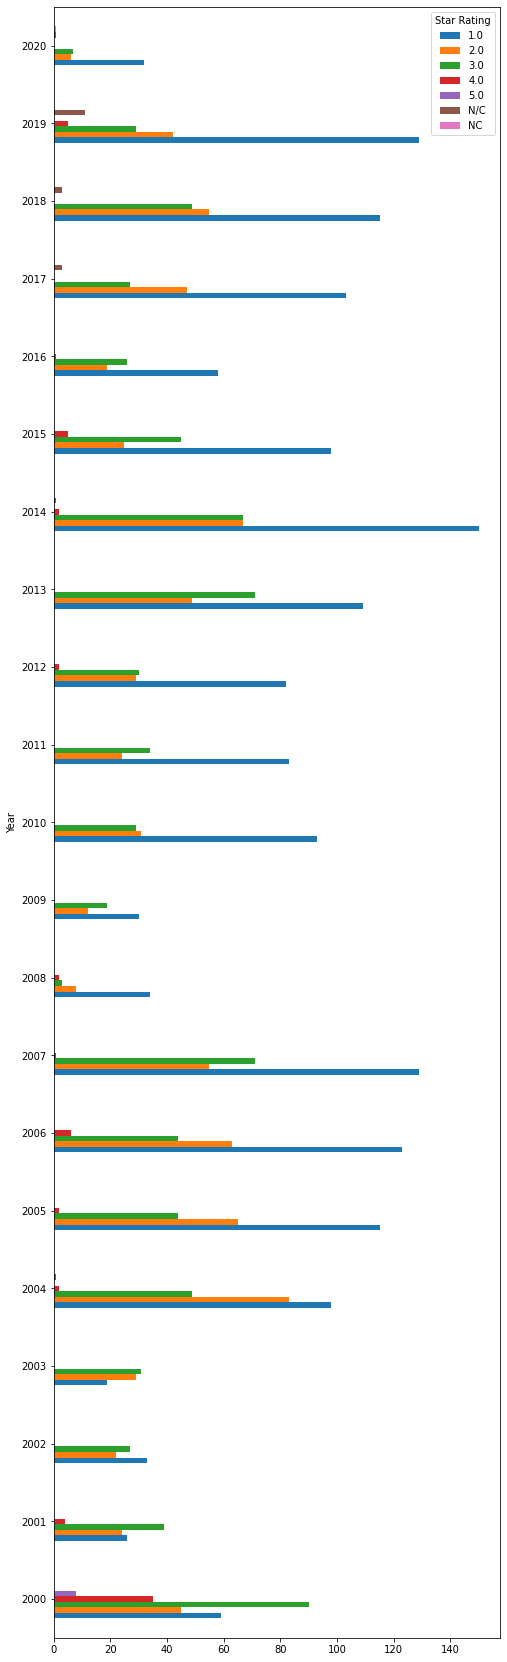

In [0]:
fig, ax = plt.subplots(figsize=(8,30))
df.groupby('Year')['Star Rating'].value_counts().unstack().plot.barh(ax=ax);

In [0]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,,2020,1,17,4,-0.135593,-2.0000
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,,2020,1,17,4,0.054397,0.6000
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,,2020,1,17,4,0.000000,0.0000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,,2020,1,17,4,-0.024549,-0.3400
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,,2020,1,24,4,-0.006654,-0.0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,,2000,12,8,4,0.062678,1.3750
3441,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,,2000,12,8,4,0.110482,2.4375
3442,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,,2000,12,11,0,0.114583,1.3750
3443,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,,2000,12,12,1,-0.065089,-0.6875


In [0]:
df['Offer Price'].describe()

count    3445.000000
mean       14.547832
std         6.316808
min         5.000000
25%        10.000000
50%        14.000000
75%        18.000000
max        91.000000
Name: Offer Price, dtype: float64

In [0]:
df['Opening Gap % Chg'] = (df['Opening Price'] - df['Offer Price'])/df['Offer Price']

In [0]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,,2020,1,17,4,-0.135593,-2.0000,0.053571
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,,2020,1,17,4,0.054397,0.6000,0.002727
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,,2020,1,17,4,0.000000,0.0000,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,,2020,1,17,4,-0.024549,-0.3400,0.065385
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,,2020,1,24,4,-0.006654,-0.0700,0.052000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,,2000,12,8,4,0.062678,1.3750,0.371094
3441,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,,2000,12,8,4,0.110482,2.4375,0.103125
3442,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,,2000,12,11,0,0.114583,1.3750,0.122544
3443,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,,2000,12,12,1,-0.065089,-0.6875,0.111842


In [0]:
df['Opening Gap $ Chg'] = (df['Opening Price'] - df['Offer Price'])

In [0]:
df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Opening Gap $ Chg
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2,,2020,1,17,4,-0.135593,-2.00,0.053571,0.75
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1,,2020,1,17,4,0.054397,0.60,0.002727,0.03
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1,,2020,1,17,4,0.000000,0.00,0.000000,0.00
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1,,2020,1,17,4,-0.024549,-0.34,0.065385,0.85
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1,,2020,1,24,4,-0.006654,-0.07,0.052000,0.52


In [0]:
def get_mgr_count(x):
    return len(x.split('/'))

In [0]:
df['Mgr Count'] = df['Managers'].apply(get_mgr_count)

In [0]:
df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Opening Gap $ Chg,Mgr Count
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2,,2020,1,17,4,-0.135593,-2.00,0.053571,0.75,2
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1,,2020,1,17,4,0.054397,0.60,0.002727,0.03,2
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1,,2020,1,17,4,0.000000,0.00,0.000000,0.00,3
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1,,2020,1,17,4,-0.024549,-0.34,0.065385,0.85,3
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1,,2020,1,24,4,-0.006654,-0.07,0.052000,0.52,1


In [0]:
df['Mgr Count'].describe().to_frame()

,Mgr Count
count,3445.000000
mean,2.184325
std,1.297271
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


In [0]:
df.groupby('Mgr Count')['1st Day Open to Close % Chg'].count().to_frame()

,1st Day Open to Close % Chg
Mgr Count,
1,1067
2,1377
3,644
4,214
5,66
6,35
7,11
8,11
9,7


In [0]:
df.groupby('Mgr Count')['1st Day Open to Close % Chg'].mean().to_frame().style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,1st Day Open to Close % Chg
Mgr Count,
1,0.016992
2,0.012845
3,0.010744
4,0.017197
5,0.006880
6,-0.006888
7,0.001684
8,0.003782
9,0.032254


In [0]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,...,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Opening Gap $ Chg,Mgr Count
0,2018-01-10,Nebula Acquisition,NEBUU,Deutsche Bank Securities/ Goldman Sachs,10.0000,10.030000,10.020000,0.002000,0.030000,0.020000,...,,2018,1,10,2,-0.000997,-0.010000,0.003000,0.030000,2
1,2018-01-12,Industrial Logistics Properties Trust,ILPT,UBS Investment Bank/ Citigroup/ RBC Capital Ma...,24.0000,23.700000,23.350000,-0.027083,-0.300000,-0.650000,...,,2018,1,12,4,-0.014768,-0.350000,-0.012500,-0.300000,3
2,2018-01-12,Liberty Oilfield Services,LBRT,"Morgan Stanley/ Goldman, Sachs/ Wells Fargo Se...",17.0000,21.200000,21.750000,0.279412,4.200000,4.750000,...,,2018,1,12,4,0.025943,0.550000,0.247059,4.200000,6
3,2018-01-12,Platinum Eagle Acquisition,EAGLU,Deutsche Bank Securities/ BofA Merrill Lynch,10.0000,10.060000,10.010000,0.001000,0.060000,0.010000,...,,2018,1,12,4,-0.004970,-0.050000,0.006000,0.060000,2
4,2018-01-24,PagSeguro Digital Ltd.,PAGS,Goldman Sachs/ Morgan Stanley,21.5000,28.200000,29.200000,0.358140,6.700000,7.700000,...,,2018,1,24,2,0.035461,1.000000,0.311628,6.700000,2
5,2018-01-25,Eyenovia,EYEN,Ladenburg Thalmann/ Roth Capital Partners​,10.0000,10.000000,9.920000,-0.008000,0.000000,-0.080000,...,,2018,1,25,3,-0.008000,-0.080000,0.000000,0.000000,2
6,2018-01-25,Gates Industrial Corporation plc,GTES,Citigroup/ Morgan Stanley/ UBS Investment Bank,19.0000,19.050000,18.500000,-0.026316,0.050000,-0.500000,...,,2018,1,25,3,-0.028871,-0.550000,0.002632,0.050000,3
7,2018-01-25,Gordon Pointe Acqusition,GPAQU,B. Riley FBR,10.0000,10.000000,10.000000,0.000000,0.000000,0.000000,...,,2018,1,25,3,0.000000,0.000000,0.000000,0.000000,1
8,2018-01-25,Menlo Therapeutics,MNLO,Jefferies/ Piper Jaffray/ Guggenheim Securities,17.0000,20.500000,28.710000,0.688824,3.500000,11.710000,...,,2018,1,25,3,0.400488,8.210000,0.205882,3.500000,3
9,2018-01-26,ARMO BioSciences,ARMO,Jefferies/ Leerink Partners/ BMO Capital Markets,17.0000,28.000000,29.740000,0.749412,11.000000,12.740000,...,,2018,1,26,4,0.062143,1.740000,0.647059,11.000000,3


In [0]:
df['Lead Mgr'] = df['Managers'].apply(lambda x: x.split('/')[0])

In [0]:
df['Lead Mgr'].unique()

array(['Jefferies', 'Credit Suisse', 'Citigroup',
       'Wells Fargo Securities', 'Deutsche Bank Securities',
       'WestPark Capital',
       'ThinkEquity (a division of Fordham Financial Management )',
       'J.P. Morgan', 'Goldman Sachs', 'EarlyBirdCapital',
       'Morgan Stanley', 'Barclays', 'Raymond James', 'Stephens',
       'Imperial Capital', 'Maxim Group LLC', 'Alexander Capital',
       'Chardan', 'I-Bankers Securities', 'JPMorgan', 'Benchmark Company',
       'Cantor', 'BofA Securities', 'Cowen', 'UBS Investment Bank',
       'BofA Merrill Lynch', 'Dawson James Securities',
       'Laidlaw & Company (UK) Ltd.', 'Northland Capital', 'Nomura',
       'Goldman Sachs (Asia)', 'BTIG', 'Maxim Group', 'B. Riley FBR',
       'Credit Suiss', 'FIG Partners', 'SVB Leerink', 'Baird',
       'Keefe, Bruyette & Woods (A Stifel Company)',
       'Roth Capital Partners', 'Oppenheimer', 'Stifel',
       'J.P. Morgan Securities', 'DPO (Direct Public Offering)',
       'BMO Capital Market

In [0]:
df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Opening Gap $ Chg,Mgr Count,Lead Mgr
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2,,2020,1,17,4,-0.135593,-2.00,0.053571,0.75,2,Jefferies
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1,,2020,1,17,4,0.054397,0.60,0.002727,0.03,2,Credit Suisse
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1,,2020,1,17,4,0.000000,0.00,0.000000,0.00,3,Citigroup
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1,,2020,1,17,4,-0.024549,-0.34,0.065385,0.85,3,Wells Fargo Securities
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1,,2020,1,24,4,-0.006654,-0.07,0.052000,0.52,1,Deutsche Bank Securities


In [0]:
df.groupby('Lead Mgr').agg({'1st Day Open to Close % Chg': ['mean', len]})\
.sort_values(by=('1st Day Open to Close % Chg', 'len'))

1st Day Open to Close % Chg       
                                           mean    len
Lead Mgr                                              
  Morgan Stanley                       0.002125    1.0
J.P. Morghan                           0.018699    1.0
​J.P. Morgan                          -0.076327    1.0
JP Turner                             -0.022222    1.0
Jefferies & Company                    0.096552    1.0
...                                         ...    ...
Citigroup                              0.001608  181.0
Credit Suisse                          0.003837  192.0
J.P. Morgan                            0.018647  195.0
Goldman Sachs                          0.016920  280.0
Morgan Stanley                         0.018570  365.0

[325 rows x 2 columns]

In [0]:
df['Lead Mgr'].unique()

array(['Deutsche Bank Securities', 'UBS Investment Bank',
       'Morgan Stanley', 'Goldman Sachs', 'Ladenburg Thalmann',
       'Citigroup', 'B. Riley FBR', 'Jefferies', 'Credit Suisse',
       'BofA Merrill Lynch', 'J.P. Morgan', 'EarlyBirdCapital',
       'Roth Capital Partners', 'Oppenheimer & Co.', '\u200bJefferies',
       'Cantor', 'Piper Jaffray', 'Barclays',
       "Sandler O'Neill & Partners", 'Goldman Sachs (Asia)',
       'Network 1 Financial Securities', 'Oppenheimer', 'Raymond James',
       'Stifel', 'Wells Fargo Securities', 'Baird', 'Stephens', 'Cowen',
       'Benchmark', 'Leerink Partners', 'Chardan', 'Evercore ISI',
       'Maxim Group ', '\u200bCredit Suisse',
       'Keefe, Bruyette & Woods (A Stifel Company)', 'Cowen and Company',
       'BMO Capital Markets', 'Joseph Gunnar & Co.', 'CICC',
       'Maxim Group', "Sandler O'Neill + Partners",
       'Cantor Fitzgerald & Co.', 'Joseph Gunnar',
       'Rodman & Renshaw (a Unit of H.C. Wainwright & Co.)',
       'CIB

In [0]:
from patsy import dmatrix

In [0]:
y = df['1st Day Open to Close % Chg'].apply(lambda x: 1 if x > .025 else 0)

In [0]:
X = dmatrix("Q('Opening Gap % Chg') + C(Q('Month'), Treatment) + C(Q('Day of Week'), Treatment)\
+ Q('Mgr Count') + Q('Lead Mgr') + Q('Offer Price') + C(Q('Star Rating'), Treatment)", df, 
return_type="dataframe")

In [0]:
X

,Intercept,"C(Q('Month'), Treatment)[T.2]","C(Q('Month'), Treatment)[T.3]","C(Q('Month'), Treatment)[T.4]","C(Q('Month'), Treatment)[T.5]","C(Q('Month'), Treatment)[T.6]","C(Q('Month'), Treatment)[T.7]","C(Q('Month'), Treatment)[T.8]","C(Q('Month'), Treatment)[T.9]","C(Q('Month'), Treatment)[T.10]","C(Q('Month'), Treatment)[T.11]","C(Q('Month'), Treatment)[T.12]","C(Q('Day of Week'), Treatment)[T.1]","C(Q('Day of Week'), Treatment)[T.2]","C(Q('Day of Week'), Treatment)[T.3]","C(Q('Day of Week'), Treatment)[T.4]","C(Q('Day of Week'), Treatment)[T.5]","C(Q('Day of Week'), Treatment)[T.6]",Q('Lead Mgr')[T. Deutsche Bank Securities],Q('Lead Mgr')[T. J.P. Morgan],Q('Lead Mgr')[T. Raymond James],Q('Lead Mgr')[T.A.G. Edwards],Q('Lead Mgr')[T.A.G. Edwards & Sons],Q('Lead Mgr')[T.A.G. Edwrads & Sons],Q('Lead Mgr')[T.AG Edwards],Q('Lead Mgr')[T.AG Edwards & Sons],Q('Lead Mgr')[T.AG Edwrads],Q('Lead Mgr')[T.AMTD],Q('Lead Mgr')[T.AMTD Global Markets],Q('Lead Mgr')[T.Adams Harkness],Q('Lead Mgr')[T.Advest],Q('Lead Mgr')[T.Aegis Capital],Q('Lead Mgr')[T.Aegis Capital ],Q('Lead Mgr')[T.Aegis Capital Corp],Q('Lead Mgr')[T.Aegis Capital Corp.],Q('Lead Mgr')[T.Alexander Capital],Q('Lead Mgr')[T.Anderson & Strudrick],Q('Lead Mgr')[T.Axiom],Q('Lead Mgr')[T.Axiom Capital Management],Q('Lead Mgr')[T.B. Riley FBR],...,Q('Lead Mgr')[T.UBS Warburg ],Q('Lead Mgr')[T.US Bancorp Piper Jaffray],Q('Lead Mgr')[T.Univest Securities],Q('Lead Mgr')[T.Utendhal Capital Partners],Q('Lead Mgr')[T.ViewTrade Securities],Q('Lead Mgr')[T.W.R. Hambracht],Q('Lead Mgr')[T.W.R. Hambrecht],Q('Lead Mgr')[T.W.R. Hambrecht + Co],Q('Lead Mgr')[T.W.R. Hambrecht + Co.],Q('Lead Mgr')[T.W.R. Hambrecht+Co],Q('Lead Mgr')[T.W.R. Hambrecht+Co.],Q('Lead Mgr')[T.WR Hambrecht],Q('Lead Mgr')[T.WR Hambrecht + Co.],Q('Lead Mgr')[T.WR Hambrecht+Co],Q('Lead Mgr')[T.WR Hambrecht+Co.],Q('Lead Mgr')[T.Wachovia],Q('Lead Mgr')[T.Wachovia Securities],Q('Lead Mgr')[T.WallachBeth Capital],Q('Lead Mgr')[T.Wedbush Morgan],Q('Lead Mgr')[T.Wedbush Morgan Securities],Q('Lead Mgr')[T.Wells Fargo Securities],Q('Lead Mgr')[T.WestPark Capital],Q('Lead Mgr')[T.William Baird],Q('Lead Mgr')[T.William Blair],Q('Lead Mgr')[T.William Blair & Company],Q('Lead Mgr')[T.Wunderlich],Q('Lead Mgr')[T.Wunderlich Securities],Q('Lead Mgr')[T.​Barclays],Q('Lead Mgr')[T.​Credit Suisse],Q('Lead Mgr')[T.​J.P. Morgan],Q('Lead Mgr')[T.​Jefferies],"C(Q('Star Rating'), Treatment)[T.2.0]","C(Q('Star Rating'), Treatment)[T.3.0]","C(Q('Star Rating'), Treatment)[T.4.0]","C(Q('Star Rating'), Treatment)[T.5.0]","C(Q('Star Rating'), Treatment)[T.N/C]","C(Q('Star Rating'), Treatment)[T.NC]",Q('Opening Gap % Chg'),Q('Mgr Count'),Q('Offer Price')
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.053571,2.0,14.00
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002727,2.0,11.00
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,13.50
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065385

In [0]:
X.shape

(3445, 351)

In [0]:
from sklearn.linear_model import LogisticRegression

X_train = X[:-200]
y_train = y[:-200]

X_test = X[-200:]
y_test = y[-200:]

clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_hat = clf.predict(X_test)
y_true = y_test

In [0]:
pdf = pd.DataFrame({'y_true': y_true, 'y_hat': y_hat})

In [0]:
pdf['correct'] = pdf.apply(lambda x: 1 if x['y_true'] == x['y_hat'] else 0, axis=1)

In [0]:
pdf

,y_true,y_hat,correct
3245,1,1,1
3246,0,0,1
3247,0,0,1
3248,0,0,1
3249,0,0,1
...,...,...,...
3440,1,0,0
3441,1,0,0
3442,1,0,0
3443,0,0,1


In [0]:
pdf['y_true'].value_counts(normalize=True)

1    0.51
0    0.49
Name: y_true, dtype: float64

In [0]:
pdf['correct'].value_counts(normalize=True)

1    0.53
0    0.47
Name: correct, dtype: float64

In [0]:
pdf['y_hat'].value_counts(normalize=True)

0    0.87
1    0.13
Name: y_hat, dtype: float64

In [0]:
pdf[(pdf['y_hat']==1)]['correct'].value_counts(normalize=True)
#Correct: 65%, false: 34%

1    0.653846
0    0.346154
Name: correct, dtype: float64

In [0]:
pdf[(pdf['y_hat']==1)]['correct'].describe()

count    26.000000
mean      0.653846
std       0.485165
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: correct, dtype: float64

In [0]:
results = pd.merge(df[['1st Day Open to Close $ Chg']], pdf, left_index=True, right_index=True)
results

,1st Day Open to Close $ Chg,y_true,y_hat,correct
3245,9.125000,1,1,1
3246,-15.875000,0,0,1
3247,-1.343750,0,0,1
3248,-2.062500,0,0,1
3249,-1.234375,0,0,1
...,...,...,...,...
3440,1.375000,1,0,0
3441,2.437500,1,0,0
3442,1.375000,1,0,0
3443,-0.687500,0,0,1


In [0]:
results['1st Day Open to Close $ Chg'].sum()

215.71875

In [0]:
results['1st Day Open to Close $ Chg'].describe()

count    200.000000
mean       1.078594
std        4.136920
min      -15.875000
25%       -0.578125
50%        0.312500
75%        1.902344
max       20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

In [0]:
# ipo buys
results[results['y_hat']==1]['1st Day Open to Close $ Chg'].sum()

45.65625

In [0]:
# ipo buys
results[results['y_hat']==1]['1st Day Open to Close $ Chg'].describe()

count    26.000000
mean      1.756010
std       7.056903
min      -9.875000
25%      -2.312500
50%       0.546875
75%       4.542969
max      20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

In [0]:
# ipo buys that made money 
results[(results['y_true']==1)&(results['y_hat']==1)]['1st Day Open to Close $ Chg'].sum()

88.84375

In [0]:
# ipo buys that made money
results[(results['y_true']==1)&(results['y_hat']==1)]['1st Day Open to Close $ Chg'].describe()

count    17.000000
mean      5.226103
std       5.874959
min       0.250000
25%       0.562500
50%       3.125000
75%       9.125000
max      20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

In [0]:
# ipo buys that lost money
results[(results['y_true']==0)&(results['y_hat']==1)]['1st Day Open to Close $ Chg'].sum()

-43.1875

In [0]:
# ipo buys that lost money
results[(results['y_true']==0)&(results['y_hat']==1)]['1st Day Open to Close $ Chg'].describe()

count    9.000000
mean    -4.798611
std      3.559864
min     -9.875000
25%     -8.250000
50%     -3.937500
75%     -2.500000
max     -0.062500
Name: 1st Day Open to Close $ Chg, dtype: float64

In [0]:
# ipos not bought that would have made money
results[(results['y_true']==1)&(results['y_hat']==0)]['1st Day Open to Close $ Chg'].sum()

268.15625

In [0]:
# ipos not bought that would have made money
results[(results['y_true']==1)&(results['y_hat']==0)]['1st Day Open to Close $ Chg'].describe()

count    85.000000
mean      3.154779
std       3.434584
min       0.250000
25%       0.843750
50%       1.750000
75%       4.187500
max      15.062500
Name: 1st Day Open to Close $ Chg, dtype: float64

In [0]:
print(X_train.columns.shape)
print(clf.coef_.T.shape)
print(type(X_train.columns))
print(type(clf.coef_.T.shape))

(351,)
(351, 1)
<class 'pandas.core.indexes.base.Index'>
<class 'tuple'>


In [0]:
X_train.columns[:10]

Index(['Intercept', 'C(Q('Month'), Treatment)[T.2]',
       'C(Q('Month'), Treatment)[T.3]', 'C(Q('Month'), Treatment)[T.4]',
       'C(Q('Month'), Treatment)[T.5]', 'C(Q('Month'), Treatment)[T.6]',
       'C(Q('Month'), Treatment)[T.7]', 'C(Q('Month'), Treatment)[T.8]',
       'C(Q('Month'), Treatment)[T.9]', 'C(Q('Month'), Treatment)[T.10]'],
      dtype='object')

In [0]:
clf.coef_.T[:10]

array([[-0.47184786],
       [ 0.00903196],
       [ 0.04260766],
       [ 0.08042796],
       [ 0.09167608],
       [ 0.12421608],
       [-0.07248048],
       [ 0.28834476],
       [ 0.18965889],
       [-0.0795232 ]])

In [0]:
fv = pd.DataFrame(index=X_train.columns, data=clf.coef_.T).reset_index()
fv.columns = [ 'Feature','Coef']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Feature,Coef
0,Q('Lead Mgr')[T.BMO Capital Markets],1.790861
1,"Q('Lead Mgr')[T.C.E. Unterberg, Towbin]",1.039991
2,Q('Lead Mgr')[T.Wachovia],0.849191
3,Q('Lead Mgr')[T.Sandler ONeill & Partners],0.807870
4,Q('Lead Mgr')[T. J.P. Morgan],0.790572
...,...,...
346,Q('Lead Mgr')[T.Chardan],-1.161632
347,Q('Lead Mgr')[T.Cantor],-1.233397
348,Q('Lead Mgr')[T.Morgan Joseph],-1.233732
349,"Q('Lead Mgr')[T.Keefe, Bruyette & Woods (A Sti...",-1.294601


In [0]:
fv[fv['Feature'].str.contains('Day')]

,Feature,Coef
12,"C(Q('Day of Week'), Treatment)[T.1]",-0.157285
13,"C(Q('Day of Week'), Treatment)[T.2]",0.061789
14,"C(Q('Day of Week'), Treatment)[T.3]",0.196953
15,"C(Q('Day of Week'), Treatment)[T.4]",0.062598
16,"C(Q('Day of Week'), Treatment)[T.5]",-0.146621
17,"C(Q('Day of Week'), Treatment)[T.6]",-0.100354


In [0]:
fv[fv['Feature'].str.contains('Month')]

,Feature,Coef
1,"C(Q('Month'), Treatment)[T.2]",0.009032
2,"C(Q('Month'), Treatment)[T.3]",0.042608
3,"C(Q('Month'), Treatment)[T.4]",0.080428
4,"C(Q('Month'), Treatment)[T.5]",0.091676
5,"C(Q('Month'), Treatment)[T.6]",0.124216
6,"C(Q('Month'), Treatment)[T.7]",-0.072480
7,"C(Q('Month'), Treatment)[T.8]",0.288345
8,"C(Q('Month'), Treatment)[T.9]",0.189659
9,"C(Q('Month'), Treatment)[T.10]",-0.079523
10,"C(Q('Month'), Treatment)[T.11]",0.098721


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)

In [0]:
f_importances = clf_rf.feature_importances_
f_importances[:10]

array([0.        , 0.01306722, 0.01306682, 0.01388388, 0.01562739,
       0.01621935, 0.01436689, 0.01153913, 0.01202262, 0.01507598])

In [0]:
f_names = X_train.columns
f_names[:10]

Index(['Intercept', 'C(Q('Month'), Treatment)[T.2]',
       'C(Q('Month'), Treatment)[T.3]', 'C(Q('Month'), Treatment)[T.4]',
       'C(Q('Month'), Treatment)[T.5]', 'C(Q('Month'), Treatment)[T.6]',
       'C(Q('Month'), Treatment)[T.7]', 'C(Q('Month'), Treatment)[T.8]',
       'C(Q('Month'), Treatment)[T.9]', 'C(Q('Month'), Treatment)[T.10]'],
      dtype='object')

In [0]:
print(len(clf_rf.estimators_))
clf_rf.estimators_[:3]

1000


[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=678370519, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=16261612, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max

In [0]:
tree=clf_rf.estimators_[0]
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=678370519, splitter='best')

In [0]:
print(len(tree.feature_importances_))
tree.feature_importances_[:10]

351


array([0.        , 0.01170324, 0.01963729, 0.01578197, 0.01723927,
       0.01855885, 0.00946817, 0.00327188, 0.00573589, 0.00753393])

In [0]:
#1000 tree, moi tree xuat 351 feature (1000x351), lay std cua 351 feature nay theo hang duoc 1000 du lieu 
f_std_nhap = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=1)
print(len(f_std_nhap))
f_std_nhap[:10]

1000


array([0.01400919, 0.01456309, 0.01424241, 0.01347378, 0.01387276,
       0.01451684, 0.01361702, 0.01350301, 0.01401228, 0.01443066])

In [0]:
#1000 tree, moi tree co 351 feature (1000x351), lay std theo cột (axis=0), được std 351 du lieu
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
print(len(f_std))
f_std[:10]

351


array([0.        , 0.00420501, 0.00423278, 0.00427915, 0.00470612,
       0.0048966 , 0.0046034 , 0.00383259, 0.0040469 , 0.00512747])

In [0]:
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True) # sort by f_importances
zzs

[(0.20032513271057972, "Q('Opening Gap % Chg')", 0.01810525413491785),
 (0.14976246016617856, "Q('Offer Price')", 0.014658700701502006),
 (0.0725130474870339, "Q('Mgr Count')", 0.012310050372628896),
 (0.02070244664936923,
  "C(Q('Day of Week'), Treatment)[T.3]",
  0.008166026868494835),
 (0.02065604629701301,
  "C(Q('Star Rating'), Treatment)[T.2.0]",
  0.008977903132596995),
 (0.020584027872619204,
  "C(Q('Day of Week'), Treatment)[T.2]",
  0.006068203537680702),
 (0.018665920869916836,
  "C(Q('Star Rating'), Treatment)[T.3.0]",
  0.007213467518861196),
 (0.018604323210051156,
  "C(Q('Day of Week'), Treatment)[T.4]",
  0.0056257687661028614),
 (0.016661664493375927,
  "C(Q('Month'), Treatment)[T.11]",
  0.004887845942934811),
 (0.01621934965953807, "C(Q('Month'), Treatment)[T.6]", 0.004896598435715369),
 (0.016214141632729013,
  "Q('Lead Mgr')[T.Morgan Stanley]",
  0.006239178721011682),
 (0.015627387952140925, "C(Q('Month'), Treatment)[T.5]", 0.004706122939180606),
 (0.0150759840940

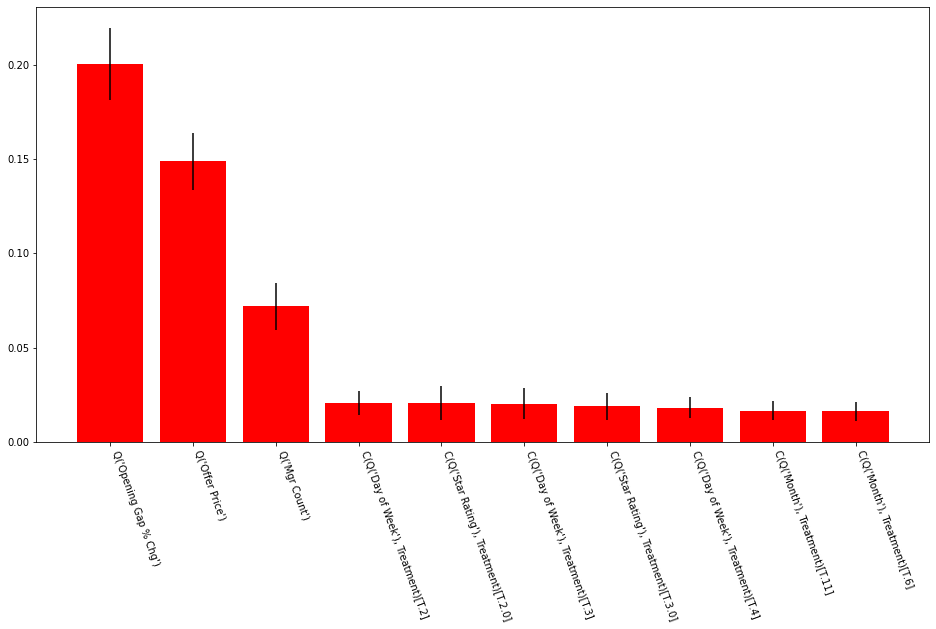

In [0]:
n_features = 10
imps = [x[0] for x in zzs[:n_features]] #f_importances
labels = [x[1] for x in zzs[:n_features]] #f_names
errs = [x[2] for x in zzs[:n_features]] #f_std

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(range(n_features), imps, color="r", yerr=errs)
plt.xticks(range(n_features), labels)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-70, ha="left" );